In [30]:
import numpy as np
import random
from matplotlib import pyplot as plt
import sounddevice as sd

In [133]:
t_secs = 0.587
Fs = 44100

# Signal parameters
N = 4   # number of signals to sum
fc = 55 # fundamental frequency (pitch)
a = .26 # fundamental amplitude

# Noise parameters
n_mean = 0
n_std = 1
an = .0823

t = np.arange(0, t_secs, 1/Fs)
noise = an*np.random.normal(loc=n_mean, scale=n_std, size=t.shape)

# Create a signal wiyh armonics of the fundamental frequency fc
ss = []
fcs = []
ss.append(a*np.sin(2*np.pi*fc*t))           # Set the pitch (the fundamental signal)
fcs.append(fc)
for i in range(1,N):
    # Set the amplitude as a random value between fundamental amplitude lower than 25% and 5% higher
    ai = np.random.uniform(a-.25, a+.05)
    # Set the frequency as a random value (min 60Hz and max 22KHz) between 1 and 200 times the fundamental frequency
    fci = min(22000, max(20, np.random.randint(1,200) * fc))
    ss.append(ai*np.sin(2*np.pi*fci*t))
    fcs.append(fci)
# Create the siganl as sums of the armonics
s = np.sum(ss, axis=0)

# Add noise
s_n = s + noise

In [135]:
sd.play(s, Fs)

In [51]:
sd.play(noise, Fs)

In [52]:
sd.play(s_n, Fs)

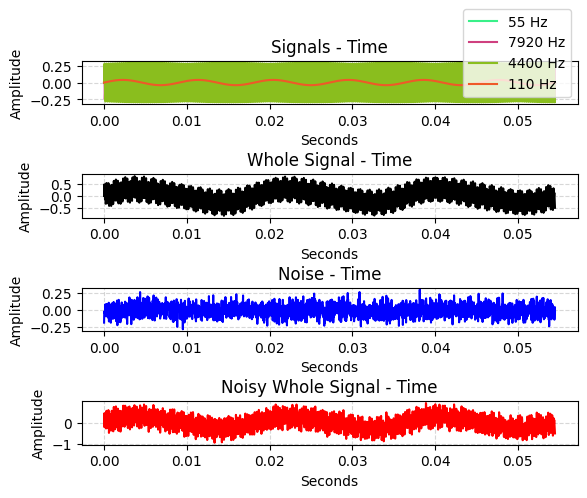

In [139]:
fig, axs = plt.subplots(4, 1)

n_periods = 3
t_range_ulim = min(min(range(len(t)), key=lambda i: abs(t[i]-n_periods*(1/fc))), len(t))

for i in range(0,len(fcs)):
    fci = fcs[i]
    si = ss[i]
    axs[0].plot(t[0:t_range_ulim], si[0:t_range_ulim], c=np.random.rand(len(fcs),3)[i], label=fci)
axs[0].legend([f"{x} Hz" for x in fcs])
axs[0].set_title('Signals - Time')
axs[0].set_xlabel('Seconds')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True, which='both', linestyle='--', alpha=0.5)

axs[1].plot(t[0:t_range_ulim], s[0:t_range_ulim], 'k')
axs[1].set_title('Whole Signal - Time')
axs[1].set_xlabel('Seconds')
axs[1].set_ylabel('Amplitude')
axs[1].grid(True, which='both', linestyle='--', alpha=0.5)

axs[2].plot(t[0:t_range_ulim], noise[0:t_range_ulim], 'b')
axs[2].set_title('Noise - Time')
axs[2].set_xlabel('Seconds')
axs[2].set_ylabel('Amplitude')
axs[2].grid(True, which='both', linestyle='--', alpha=0.5)

axs[3].plot(t[0:t_range_ulim], s_n[0:t_range_ulim], 'r')
axs[3].set_title('Noisy Whole Signal - Time')
axs[3].set_xlabel('Seconds')
axs[3].set_ylabel('Amplitude')
axs[3].grid(True, which='both', linestyle='--', alpha=0.5)

fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1.6)
plt.show()

In [137]:
# Spectrum Signal composed
S = np.fft.rfft(s)
S_N = np.fft.rfft(s_n)
Noise = np.fft.rfft(noise)
f_S = np.fft.rfftfreq(t.size, d=1/Fs)

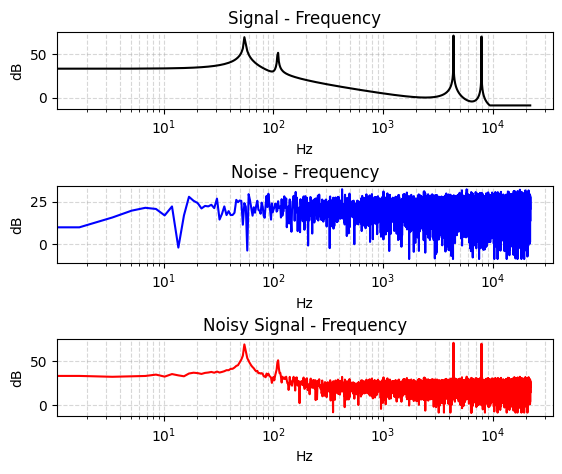

In [140]:
fig, axs = plt.subplots(3, 1)

axs[0].plot(f_S, (20*np.log10(np.abs(S))).clip(min=-9), 'k')
axs[0].set_title('Signal - Frequency')
axs[0].set_xlabel('Hz')
axs[0].set_ylabel('dB')
axs[0].set_xscale('log')
axs[0].grid(True, which='both', linestyle='--', alpha=0.5)

axs[1].plot(f_S, (20*np.log10(np.abs(Noise))).clip(min=-9), 'b')
axs[1].set_title('Noise - Frequency')
axs[1].set_xlabel('Hz')
axs[1].set_ylabel('dB')
axs[1].set_xscale('log')
axs[1].grid(True, which='both', linestyle='--', alpha=0.5)

axs[2].plot(f_S, (20*np.log10(np.abs(S_N))).clip(min=-9), 'r')
axs[2].set_title('Noisy Signal - Frequency')
axs[2].set_xlabel('Hz')
axs[2].set_ylabel('dB')
axs[2].set_xscale('log')
axs[2].grid(True, which='both', linestyle='--', alpha=0.5)

fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)
plt.show()